In [1]:
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
!unzip /content/sonar_dataset.zip

Archive:  /content/sonar_dataset.zip
  inflating: Sonar data.csv          


In [10]:
sonar_data=pd.read_csv("/content/Sonar data.csv" ,  header = None)

In [11]:
sonar_data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [12]:
sonar_data.shape

(208, 61)

In [13]:
sonar_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [15]:
sonar_data.describe().T

,count,mean,std,min,25%,50%,75%,max
0,208.0,0.029164,0.022991,0.0015,0.013350,0.02280,0.035550,0.1371
1,208.0,0.038437,0.032960,0.0006,0.016450,0.03080,0.047950,0.2339
2,208.0,0.043832,0.038428,0.0015,0.018950,0.03430,0.057950,0.3059
3,208.0,0.053892,0.046528,0.0058,0.024375,0.04405,0.064500,0.4264
4,208.0,0.075202,0.055552,0.0067,0.038050,0.06250,0.100275,0.4010
5,208.0,0.104570,0.059105,0.0102,0.067025,0.09215,0.134125,0.3823
6,208.0,0.121747,0.061788,0.0033,0.080900,0.10695,0.154000,0.3729
7,208.0,0.134799,0.085152,0.0055,0.080425,0.11210,0.169600,0.4590
8,208.0,0.178003,0.118387,0.0075,0.097025,0.15225,0.233425,0.6828
9,208.0,0.208259,0.134416,0.0113,0.111275,0.18240,0.268700,0.7106


In [16]:
sonar_data[60].value_counts()

,count
60,
M,111
R,97


In [17]:
sonar_data.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


In [18]:
sonar_data.isnull().sum()

,0
0,0
1,0
2,0
3,0
4,0
...,...
56,0
57,0
58,0
59,0


In [19]:
sonar_data.isna().sum()

,0
0,0
1,0
2,0
3,0
4,0
...,...
56,0
57,0
58,0
59,0


In [20]:
#check correlation
# Convert categorical variable into dummy/indicator variables
sonar_data_encoded = pd.get_dummies(sonar_data)

# Now calculate the correlation
sonar_data_encoded.corr()

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60_M,60_R
0,1.000000,0.735896,0.571537,0.491438,0.344797,0.238921,0.260815,0.355523,0.353420,0.318276,...,0.311729,0.322299,0.312067,0.220642,0.313725,0.368132,0.357116,0.347078,0.271694,-0.271694
1,0.735896,1.000000,0.779916,0.606684,0.419669,0.332329,0.279040,0.334615,0.316733,0.270782,...,0.346076,0.383960,0.380165,0.262263,0.280341,0.353042,0.352200,0.358761,0.231238,-0.231238
2,0.571537,0.779916,1.000000,0.781786,0.546141,0.346275,0.190434,0.237884,0.252691,0.219637,...,0.332914,0.367186,0.289731,0.287661,0.380819,0.334108,0.425047,0.373948,0.192195,-0.192195
3,0.491438,0.606684,0.781786,1.000000,0.726943,0.352805,0.246440,0.246742,0.247078,0.237769,...,0.364772,0.334211,0.284955,0.280938,0.340254,0.344865,0.420266,0.400626,0.250638,-0.250638
4,0.344797,0.419669,0.546141,0.726943,1.000000,0.597053,0.335422,0.204006,0.177906,0.183219,...,0.314985,0.205306,0.196472,0.199323,0.219395,0.238793,0.290982,0.253710,0.222232,-0.222232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,0.368132,0.353042,0.334108,0.344865,0.238793,0.203986,0.242646,0.287603,0.231745,0.212277,...,0.370764,0.404117,0.503465,0.463659,0.509805,1.000000,0.550235,0.329827,0.184191,-0.184191
58,0.357116,0.352200,0.425047,0.420266,0.290982,0.220573,0.183578,0.194400,0.097293,0.058273,...,0.346095,0.447118,0.453658,0.430804,0.431295,0.550235,1.000000,0.642872,0.130826,-0.130826
59,0.347078,0.358761,0.373948,0.400626,0.253710,0.178158,0.222493,0.146216,0.095243,0.097358,...,0.280780,0.283471,0.264399,0.349449,0.287219,0.329827,0.642872,1.000000,0.090055,-0.090055
60_M,0.271694,0.231238,0.192195,0.250638,0.222232,0.132327,0.114748,0.189314,0.321448,0.341142,...,0.141871,0.182687,0.095639,0.129341,0.000933,0.184191,0.130826,0.090055,1.000000,-1.000000


In [21]:
#visualize correlation with heatmap using plotly
import plotly.express as px
fig = px.imshow(sonar_data_encoded.corr())
fig.update_layout(width=800, height=800)
fig.show()


In [24]:
#check skewness
sonar_data_encoded.skew()

#print skewness
print("Skewness for each column: ")
for col in sonar_data_encoded.columns:
    print(col , sonar_data_encoded[col].skew())

Skewness for each column: 
0 2.1310884036179263
1 2.1556436669002847
2 2.6525178027721217
3 3.4016974370591417
4 2.018140508448359
5 1.2481657456456892
6 0.9708203074544366
7 1.481106640375856
8 1.6338699131287824
9 1.2812584154071602
10 0.9878128779952564
11 0.5886807806025769
12 0.7365842949556034
13 1.022369168524951
14 0.7639643127441458
15 0.6946708068184216
16 0.6544799912965897
17 0.5258451140663591
18 0.2831823484291812
19 -0.08533138360165297
20 -0.2527412170134073
21 -0.39228941499361286
22 -0.5943498637949105
23 -0.6918610071124024
24 -0.7889086971703967
25 -0.6715801459985935
26 -0.6278429273258318
27 -0.6154465982408337
28 -0.4420069524297421
29 -0.1323897889641462
30 0.2597970958332023
31 0.31341978888919564
32 0.423863709676594
33 0.5632955277781282
34 0.5916537771446705
35 0.619867866356787
36 0.676994060446236
37 1.0333664958915105
38 0.908835142088458
39 0.8612796836557962
40 0.8635260724515671
41 0.8601098037577954
42 0.9093169683561573
43 1.235086246369272
44 1.3668

<Axes: xlabel='Skewness', ylabel='Density'>

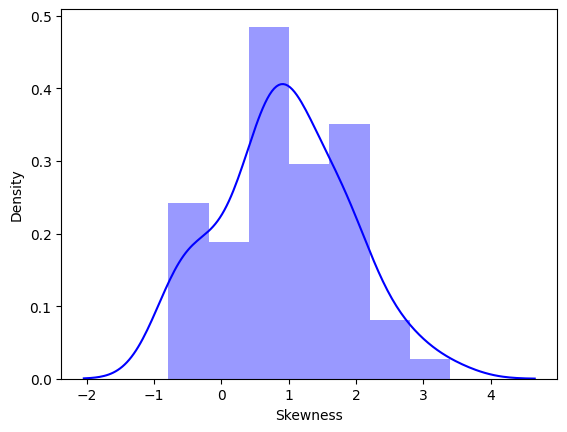

In [25]:
#visualize skewness with distplot

sns.distplot(sonar_data_encoded.skew(),color='blue',axlabel ='Skewness')

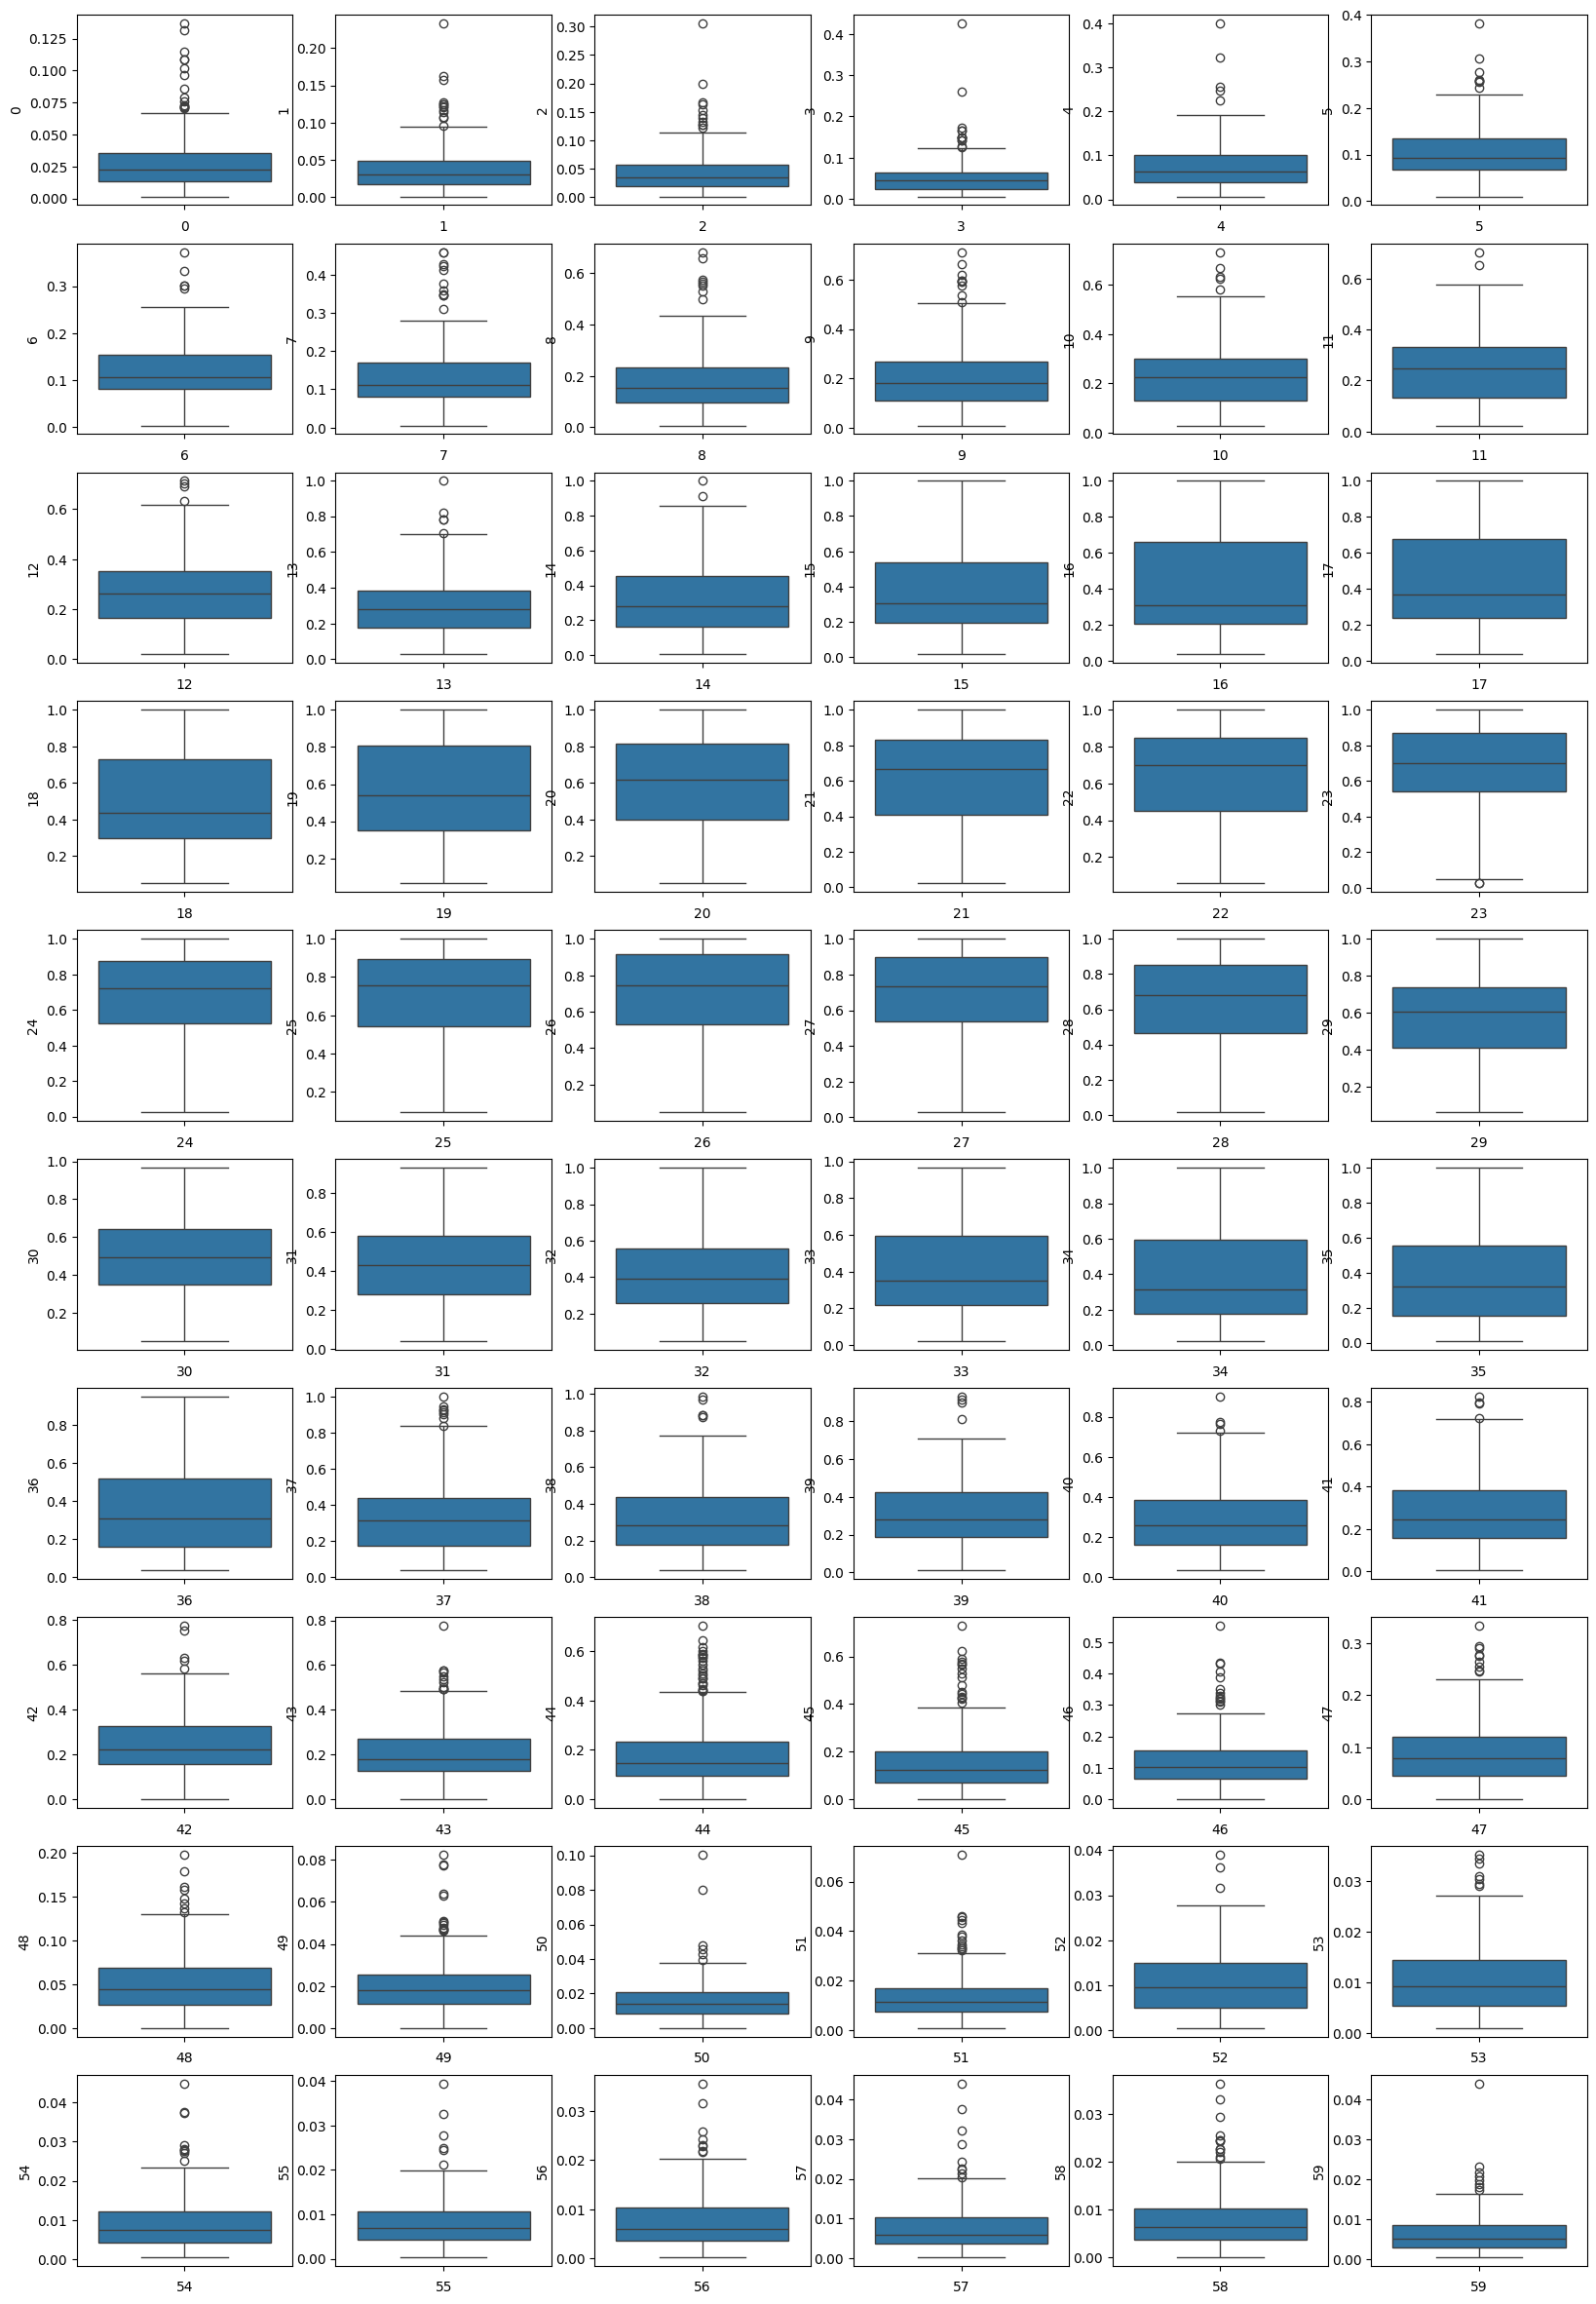

In [26]:
#visualize boxplot for each column to check outliers
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1

for column in sonar_data_encoded:
    if plotnumber<=60:
        ax=plt.subplot(10,6,plotnumber)
        sns.boxplot(sonar_data_encoded[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1

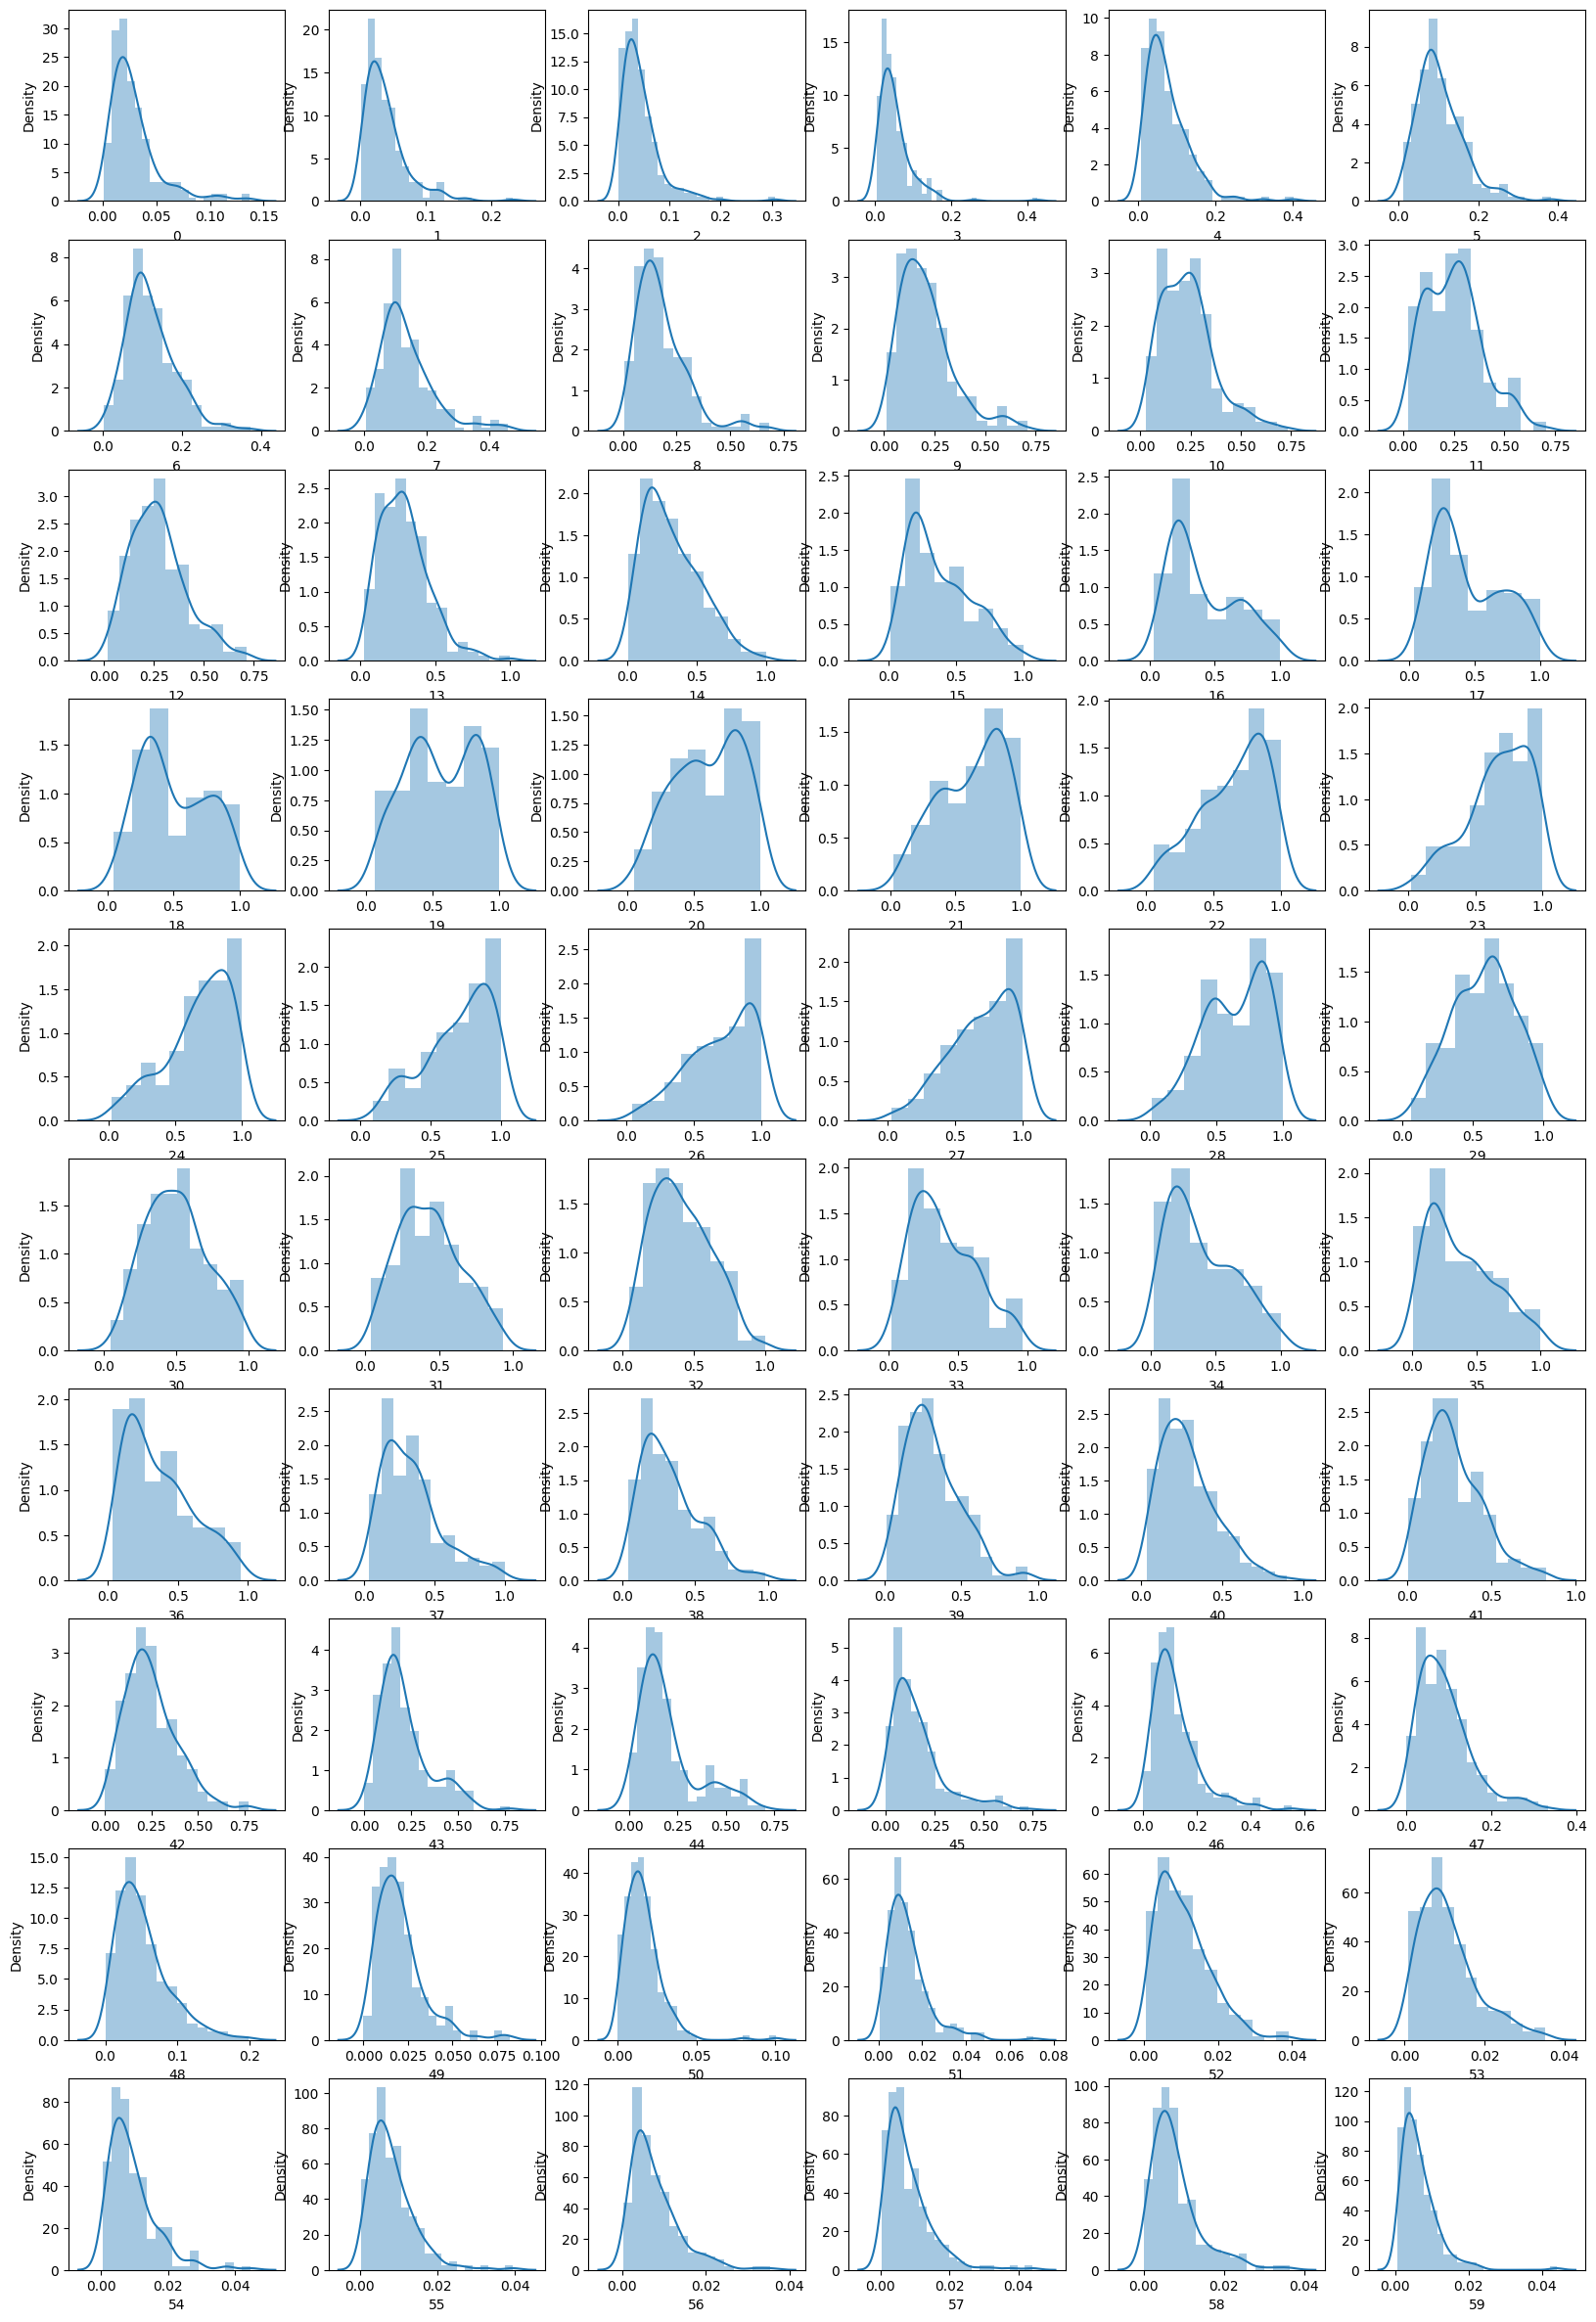

In [28]:
#visualize distplot for each column to figure out distribution
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1

for column in sonar_data_encoded:
    if plotnumber<=60:
        ax=plt.subplot(10,6,plotnumber)
        sns.distplot(sonar_data_encoded[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1

In [29]:
#Seperate features from target
features = sonar_data.drop(columns = 60)
target = sonar_data[60]
features.shape , target.shape

((208, 60), (208,))

In [30]:
pd.DataFrame(features).head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094


In [31]:
target

,60
0,R
1,R
2,R
3,R
4,R
...,...
203,M
204,M
205,M
206,M


In [32]:
#scale data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
features = sc.fit_transform(features)

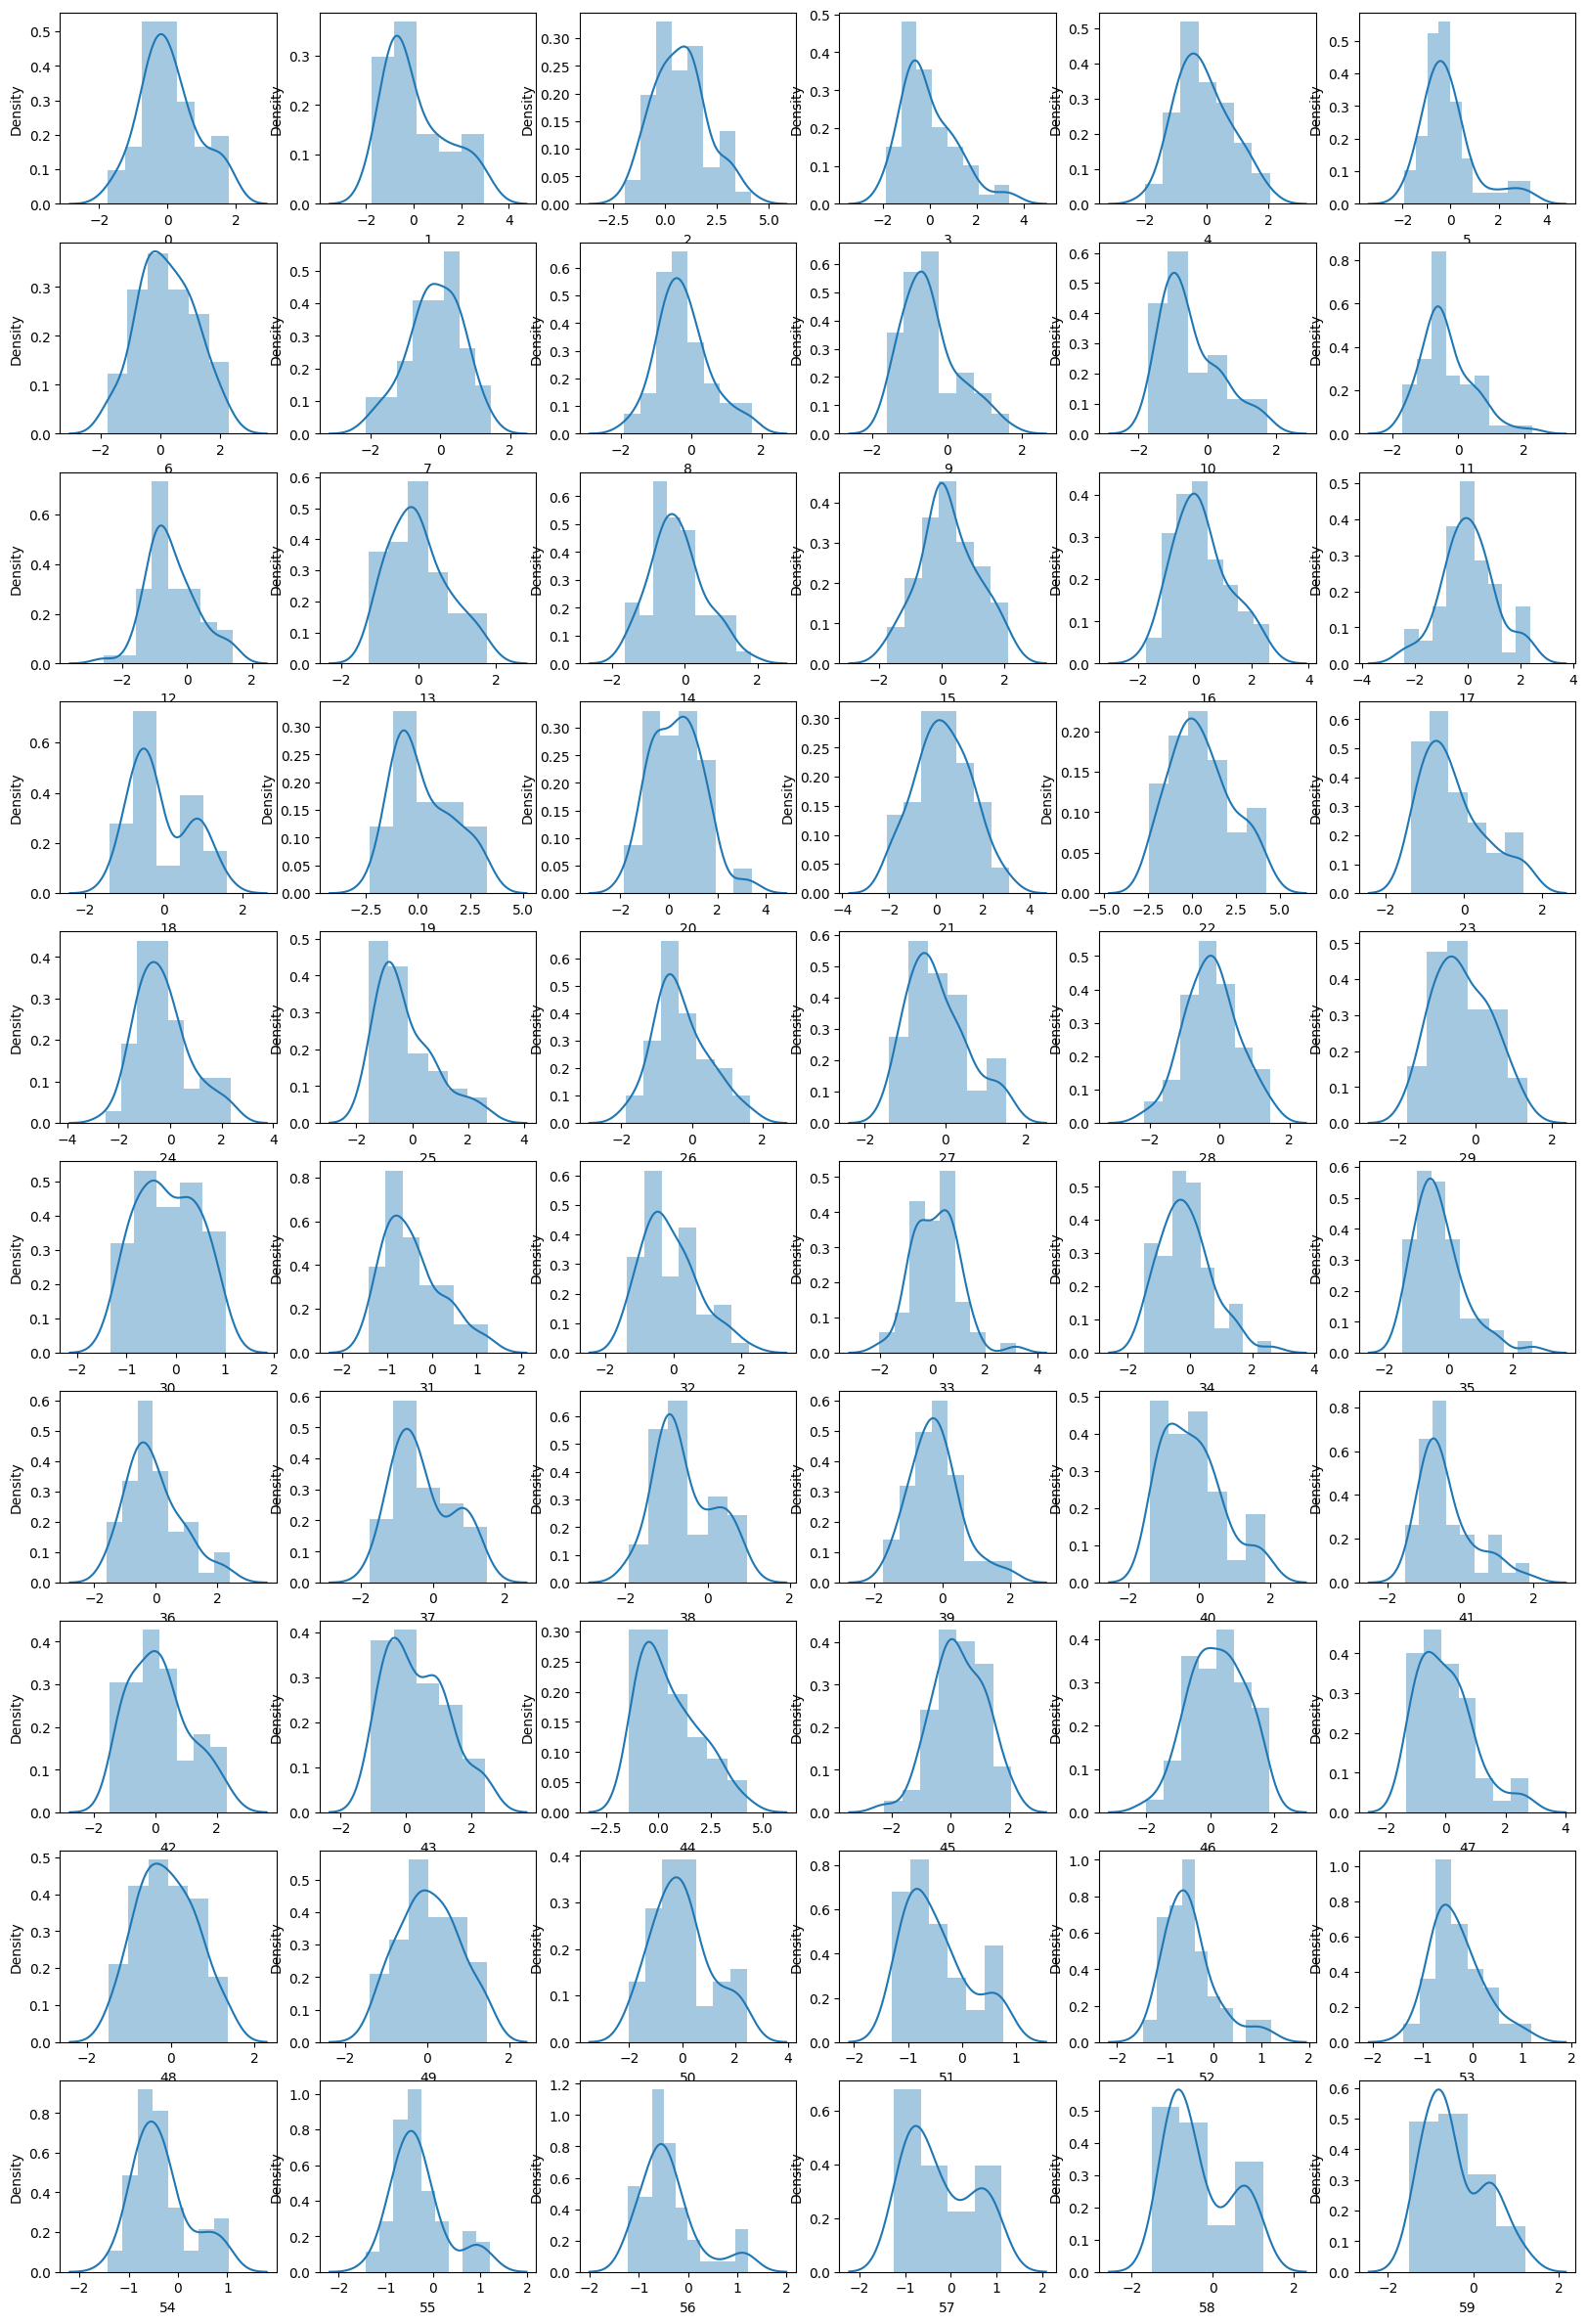

In [33]:
#visualize distplot for each column to figure out distribution
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1

for column in pd.DataFrame(features):
    if plotnumber<=60:
        ax=plt.subplot(10,6,plotnumber)
        sns.distplot(features[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1

In [55]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from lazypredict.Supervised import LazyClassifier

In [56]:
import zipfile

# Path to your ZIP file
zip_path = "/content/sonar_dataset.zip"  # update if your ZIP file has a different name

# Unzip it
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/")  # extracts to the current directory

In [57]:


# Load the CSV after extraction
sonar_data = pd.read_csv("/content/Sonar data.csv", header=None)

# Check it loaded correctly
print(sonar_data.shape)
sonar_data.head()


(208, 61)


,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.02,0.04,0.04,0.02,0.10,0.10,0.15,0.16,0.31,0.21,...,0.00,0.01,0.02,0.01,0.02,0.02,0.01,0.01,0.00,R
1,0.05,0.05,0.08,0.07,0.12,0.26,0.22,0.35,0.33,0.29,...,0.01,0.01,0.00,0.01,0.02,0.01,0.00,0.01,0.00,R
2,0.03,0.06,0.11,0.11,0.10,0.23,0.24,0.38,0.56,0.62,...,0.02,0.02,0.01,0.02,0.02,0.03,0.02,0.01,0.01,R
3,0.01,0.02,0.06,0.02,0.02,0.04,0.11,0.13,0.06,0.13,...,0.01,0.00,0.01,0.01,0.01,0.01,0.00,0.00,0.01,R
4,0.08,0.07,0.05,0.04,0.06,0.06,0.12,0.25,0.36,0.45,...,0.00,0.01,0.01,0.01,0.00,0.01,0.00,0.01,0.01,R


In [63]:
# STEP 1: Load the CSV after extraction
import pandas as pd

sonar_data = pd.read_csv("/content/Sonar data.csv", header=None)

# Check the shape and view the first few rows
print("Shape of dataset:", sonar_data.shape)
display(sonar_data.head())  # If using Jupyter/Colab

# STEP 2: Separate features and target
X = sonar_data.iloc[:, :-1]  # all columns except the last one
y = sonar_data.iloc[:, -1]   # last column is the target (R or M)

# STEP 3: Encode target labels (R and M → 0 and 1)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# STEP 4: Train-test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# STEP 5: LazyPredict for classification
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(x_train, x_test, y_train, y_test)

# STEP 6: Show model performance
print("Top 5 Models:\n")
display(models.head())  # Shows table in Jupyter/Colab


Shape of dataset: (208, 61)


,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.02,0.04,0.04,0.02,0.10,0.10,0.15,0.16,0.31,0.21,...,0.00,0.01,0.02,0.01,0.02,0.02,0.01,0.01,0.00,R
1,0.05,0.05,0.08,0.07,0.12,0.26,0.22,0.35,0.33,0.29,...,0.01,0.01,0.00,0.01,0.02,0.01,0.00,0.01,0.00,R
2,0.03,0.06,0.11,0.11,0.10,0.23,0.24,0.38,0.56,0.62,...,0.02,0.02,0.01,0.02,0.02,0.03,0.02,0.01,0.01,R
3,0.01,0.02,0.06,0.02,0.02,0.04,0.11,0.13,0.06,0.13,...,0.01,0.00,0.01,0.01,0.01,0.01,0.00,0.00,0.01,R
4,0.08,0.07,0.05,0.04,0.06,0.06,0.12,0.25,0.36,0.45,...,0.00,0.01,0.01,0.01,0.00,0.01,0.00,0.01,0.01,R


  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 75, number of negative: 81
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000600 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3104
[LightGBM] [Info] Number of data points in the train set: 156, number of used features: 60
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.480769 -> initscore=-0.076961
[LightGBM] [Info] Start training from score -0.076961
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
KNeighborsClassifier,0.92,0.93,0.93,0.92,0.05
NuSVC,0.92,0.93,0.93,0.92,0.03
SVC,0.90,0.91,0.91,0.90,0.02
ExtraTreesClassifier,0.90,0.90,0.90,0.90,0.30
LGBMClassifier,0.88,0.90,0.90,0.89,0.10


In [64]:
models.sort_values(by="Accuracy", ascending=False)


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
KNeighborsClassifier,0.92,0.93,0.93,0.92,0.05
NuSVC,0.92,0.93,0.93,0.92,0.03
SVC,0.90,0.91,0.91,0.90,0.02
ExtraTreesClassifier,0.90,0.90,0.90,0.90,0.30
LGBMClassifier,0.88,0.90,0.90,0.89,0.10
LabelPropagation,0.87,0.85,0.85,0.86,0.06
LabelSpreading,0.87,0.85,0.85,0.86,0.03
AdaBoostClassifier,0.85,0.85,0.85,0.85,0.31
Perceptron,0.85,0.85,0.85,0.85,0.02


In [65]:
import pandas as pd
pd.set_option("display.max_rows", None)  # show all rows
models  # this will now show everything


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
KNeighborsClassifier,0.92,0.93,0.93,0.92,0.05
NuSVC,0.92,0.93,0.93,0.92,0.03
SVC,0.90,0.91,0.91,0.90,0.02
ExtraTreesClassifier,0.90,0.90,0.90,0.90,0.30
LGBMClassifier,0.88,0.90,0.90,0.89,0.10
Perceptron,0.85,0.85,0.85,0.85,0.02
AdaBoostClassifier,0.85,0.85,0.85,0.85,0.31
RandomForestClassifier,0.85,0.85,0.85,0.85,0.25
SGDClassifier,0.85,0.85,0.85,0.85,0.02


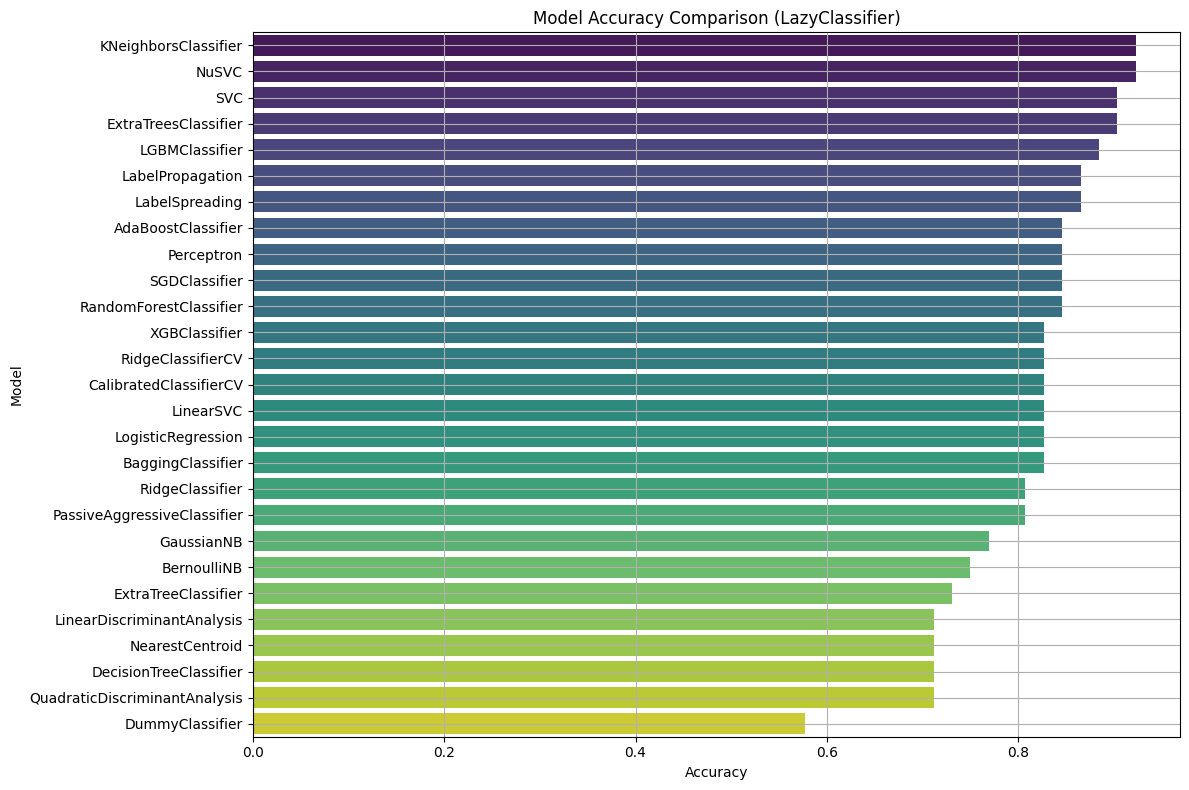

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort models by Accuracy
sorted_models = models.sort_values(by="Accuracy", ascending=False)

# Set figure size
plt.figure(figsize=(12, 8))

# Create barplot
sns.barplot(x=sorted_models["Accuracy"], y=sorted_models.index, palette="viridis")

# Add labels and title
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.title("Model Accuracy Comparison (LazyClassifier)")
plt.grid(True)
plt.tight_layout()

plt.show()


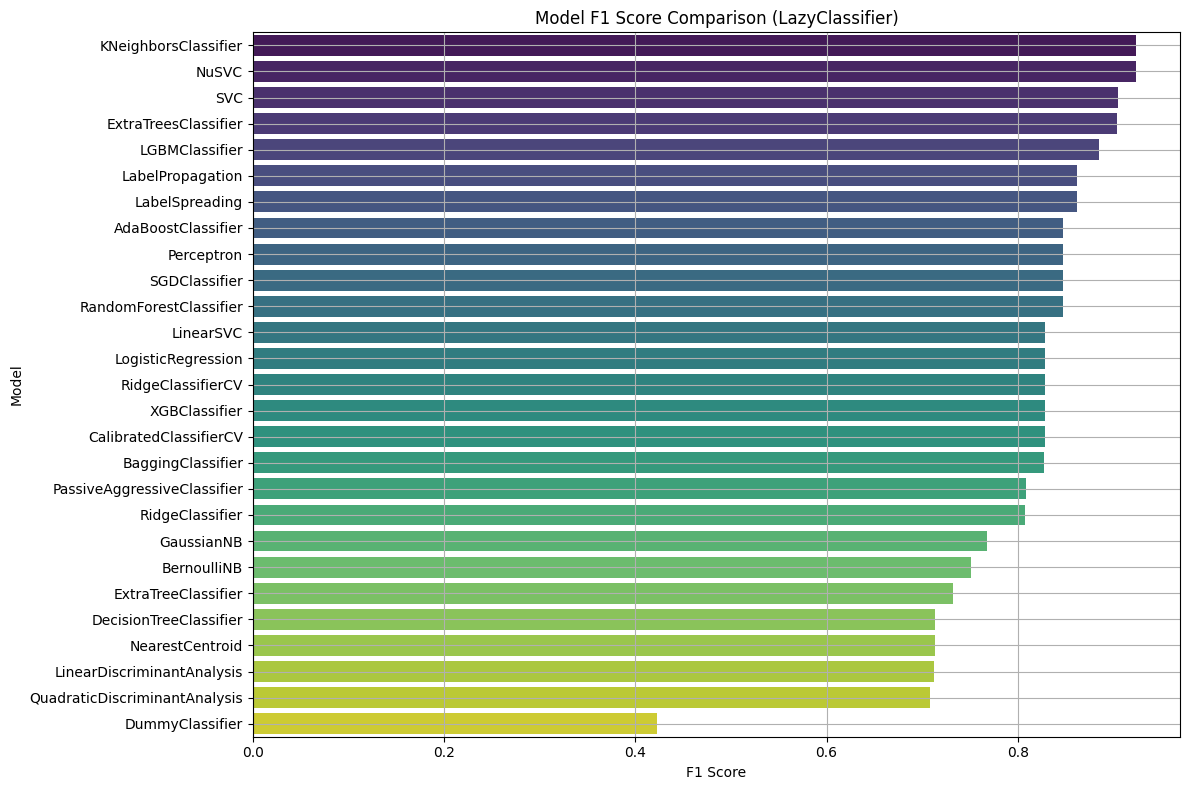

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort models by Accuracy
sorted_models = models.sort_values(by="F1 Score", ascending=False)

# Set figure size
plt.figure(figsize=(12, 8))

# Create barplot
sns.barplot(x=sorted_models["F1 Score"], y=sorted_models.index, palette="viridis")

# Add labels and title
plt.xlabel("F1 Score")
plt.ylabel("Model")
plt.title("Model F1 Score Comparison (LazyClassifier)")
plt.grid(True)
plt.tight_layout()

plt.show()


In [68]:
print(models.columns)


Index(['Accuracy', 'Balanced Accuracy', 'ROC AUC', 'F1 Score', 'Time Taken'], dtype='object')


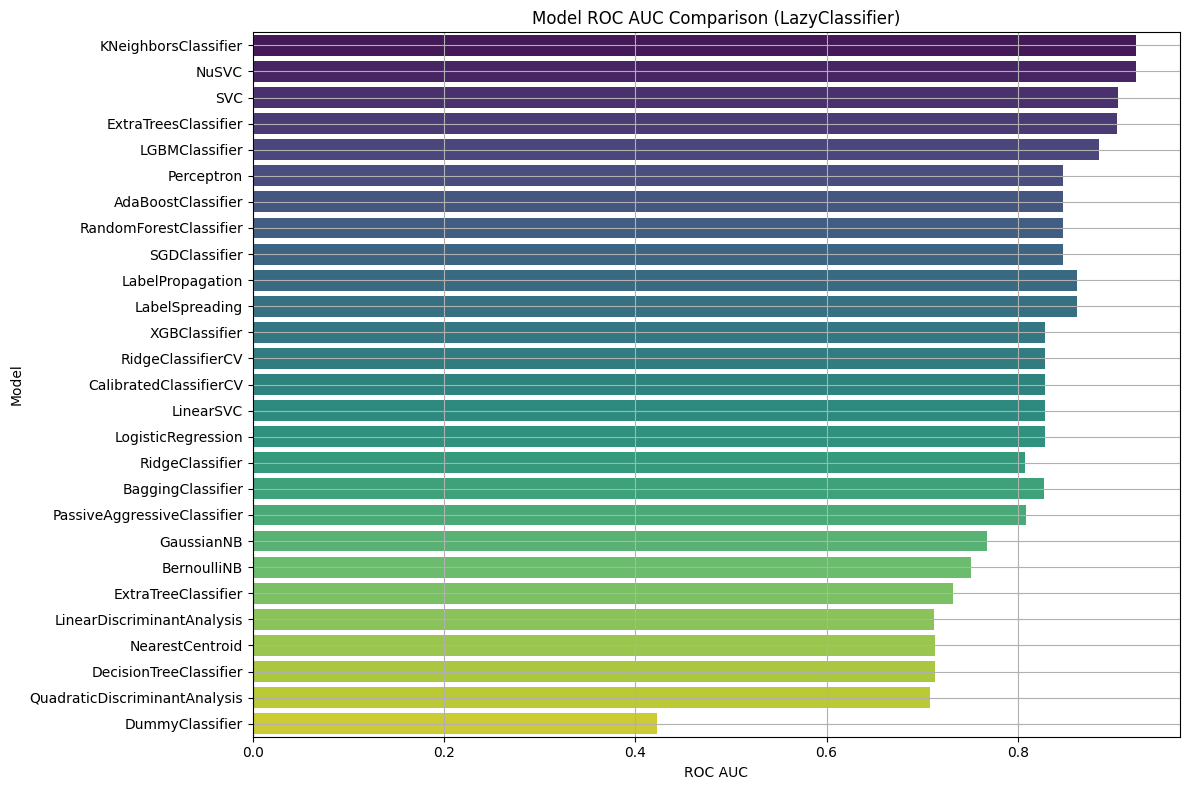

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort models by Accuracy
sorted_models = models.sort_values(by="ROC AUC", ascending=False)

# Set figure size
plt.figure(figsize=(12, 8))

# Create barplot
sns.barplot(x=sorted_models["F1 Score"], y=sorted_models.index, palette="viridis")

# Add labels and title
plt.xlabel("ROC AUC")
plt.ylabel("Model")
plt.title("Model ROC AUC Comparison (LazyClassifier)")
plt.grid(True)
plt.tight_layout()

plt.show()


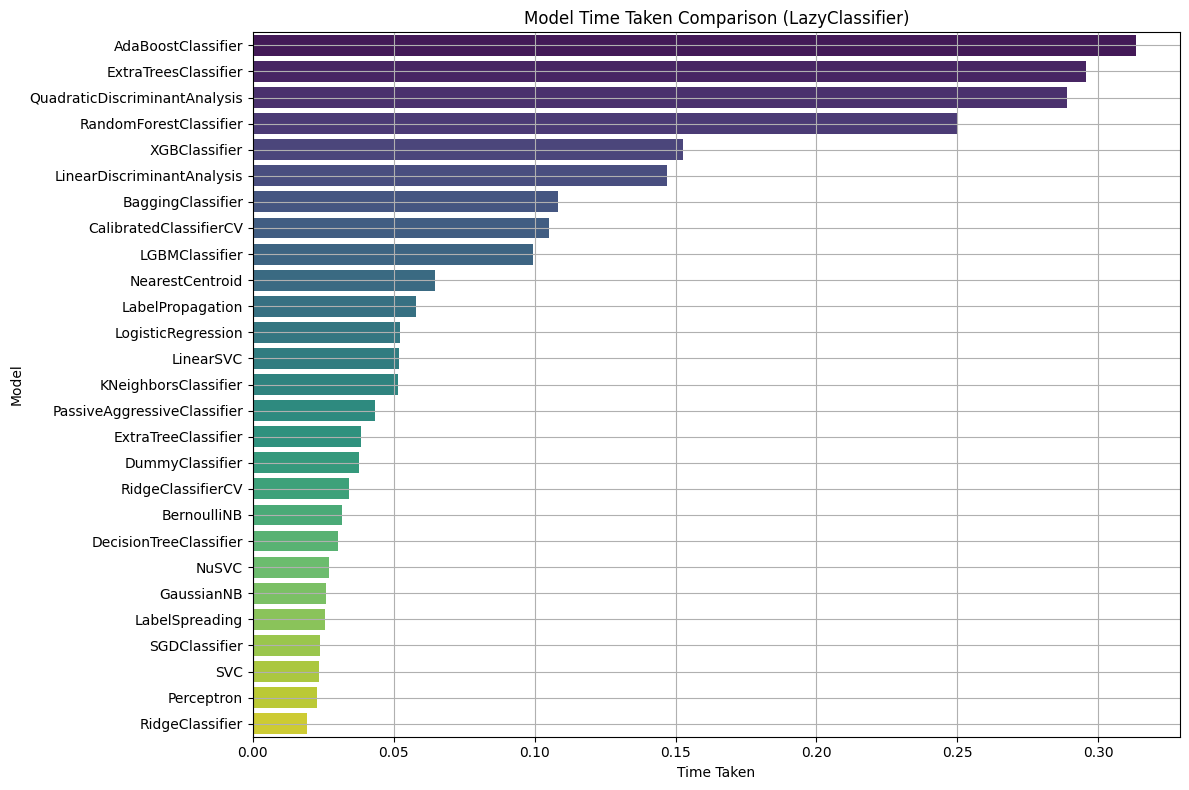

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort models by Accuracy
sorted_models = models.sort_values(by="Time Taken", ascending=False)

# Set figure size
plt.figure(figsize=(12, 8))

# Create barplot
sns.barplot(x=sorted_models["Time Taken"], y=sorted_models.index, palette="viridis")

# Add labels and title
plt.xlabel("Time Taken")
plt.ylabel("Model")
plt.title("Model Time Taken Comparison (LazyClassifier)")
plt.grid(True)
plt.tight_layout()

plt.show()


Training Accuracy: 0.8141025641025641
Testing Accuracy: 0.9038461538461539

Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.93      0.92        30
           1       0.90      0.86      0.88        22

    accuracy                           0.90        52
   macro avg       0.90      0.90      0.90        52
weighted avg       0.90      0.90      0.90        52



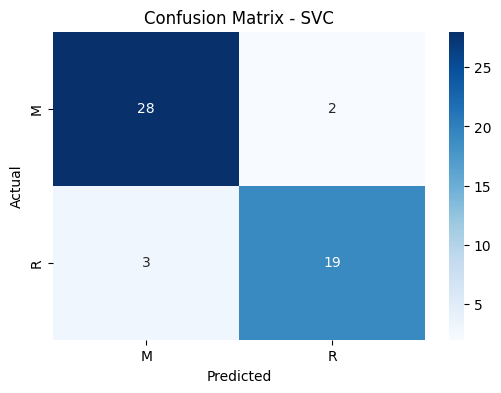

In [73]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Create the SVC model
svc_model = SVC(kernel='linear')  # Try 'rbf' or 'poly' for other kernels

# 2. Fit the model to the training data
svc_model.fit(x_train, y_train)

# 3. Predict on training and test sets
y_train_pred = svc_model.predict(x_train)
y_test_pred = svc_model.predict(x_test)

# 4. Accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# 5. Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_test_pred))

# 6. Confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# 7. Plot confusion matrix as heatmap
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['M', 'R'], yticklabels=['M', 'R'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVC")
plt.show()


In [75]:
print(classification_report(y_test, y_test_pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92        30
           1       0.90      0.86      0.88        22

    accuracy                           0.90        52
   macro avg       0.90      0.90      0.90        52
weighted avg       0.90      0.90      0.90        52



In [76]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Create the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can change the number of neighbors

# 2. Fit the model to the training data
knn_model.fit(x_train, y_train)

# 3. Predict on training and test sets
y_train_pred = knn_model.predict(x_train)
y_test_pred = knn_model.predict(x_test)

# 4. Accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.8012820512820513
Testing Accuracy: 0.8461538461538461



Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.83      0.86        30
           1       0.79      0.86      0.83        22

    accuracy                           0.85        52
   macro avg       0.84      0.85      0.84        52
weighted avg       0.85      0.85      0.85        52



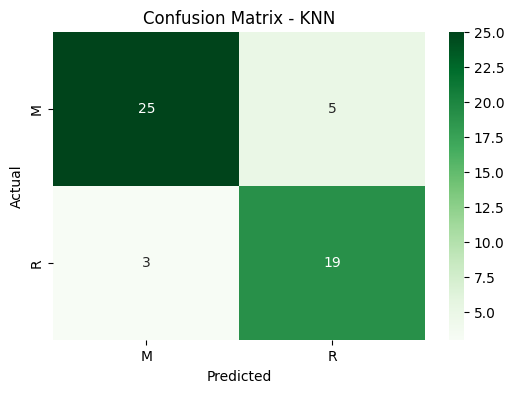

In [77]:
# 5. Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_test_pred))

# 6. Confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# 7. Plot confusion matrix as heatmap
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=['M', 'R'], yticklabels=['M', 'R'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - KNN")
plt.show()